In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris

In [45]:
iris = load_iris()
n_estimators=5
gb = GradientBoostingClassifier(n_estimators=n_estimators)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2, random_state=42)

In [47]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=5)

In [48]:
from sklearn.metrics import classification_report

preds = gb.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [49]:
pd.DataFrame(X_train, columns=iris.feature_names).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,120.000000,120.000000,120.000000
mean,5.809167,3.061667,3.726667,1.183333
std,0.823805,0.449123,1.752345,0.752289
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


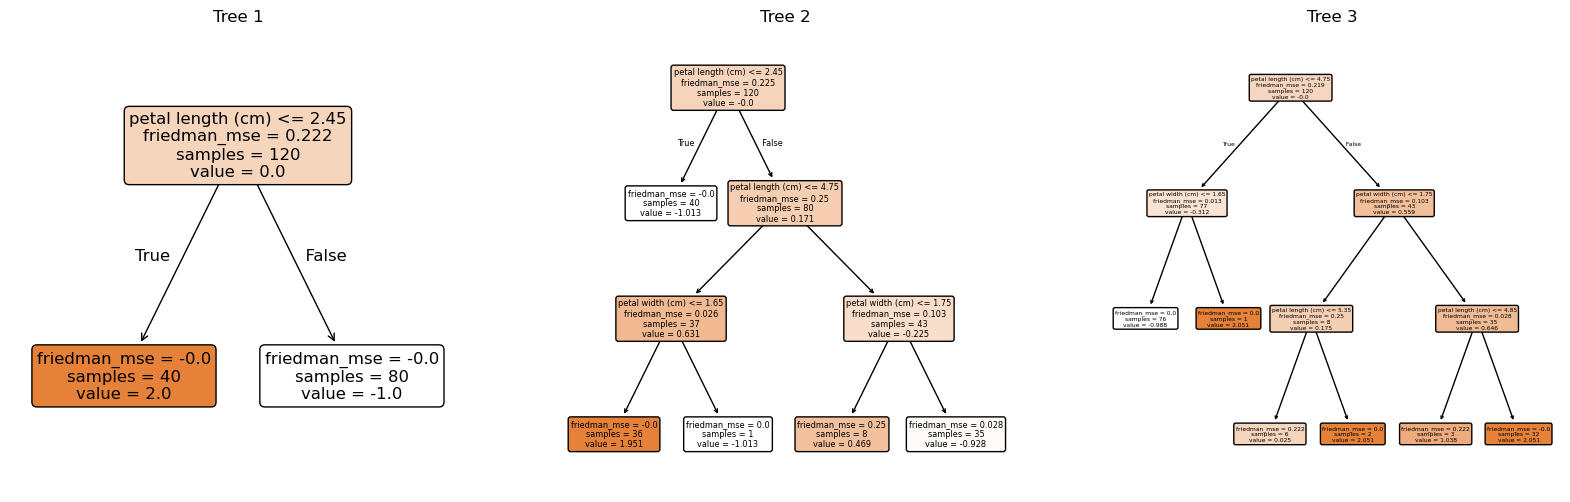

In [54]:
from sklearn.tree import plot_tree

# estimators = gb.estimators_.reshape(n_estimators)

fig, axes = plt.subplots(1, len(gb.estimators_[0, :]), figsize=(20, 6))
for i, estimator in enumerate(gb.estimators_[0, :]):
    plot_tree(
        estimator,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        filled=True,
        rounded=True,
        ax=axes[i]
    )
    axes[i].set_title(f"Tree {i+1}")
plt.show()

In [ ]:
gb.estimators_.shape

(5, 3)

In [ ]:
gb.n_estimators_

5